In [1]:
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
plt.style.use('ggplot')
#np.random.seed(1234)

np.set_printoptions(formatter={'all':lambda x: '%.3f' % x})

In [2]:
from IPython.display import Image
from numpy.core.umath_tests import matrix_multiply as mm

In [3]:
from scipy.optimize import minimize
from scipy.stats import bernoulli, binom

In [4]:
def neg_loglik(thetas, n, xs, zs):
    return -np.sum([binom(n, thetas[z]).logpmf(x) for (x, z) in zip(xs, zs)])

In [56]:
binom(10, [0.1,0.1]).logpmf([9,1])

array([-18.526, -0.948])

In [12]:
m = 10
theta_A = 0.8
theta_B = 0.3
theta_0 = [theta_A, theta_B]

coin_A = bernoulli(theta_A)
coin_B = bernoulli(theta_B)

xs = map(sum, [coin_A.rvs(m), coin_A.rvs(m), coin_B.rvs(m), coin_A.rvs(m), coin_B.rvs(m)])
zs = [0, 0, 1, 0, 1]

In [13]:
xs = np.array(xs)
xs

array([9.000, 9.000, 5.000, 8.000, 3.000])

In [14]:
ml_A = np.sum(xs[[0,1,3]])/(3.0*m)
ml_B = np.sum(xs[[2,4]])/(2.0*m)
ml_A, ml_B

(0.8666666666666667, 0.40000000000000002)

In [15]:
xs[[0,1,3]]

array([9.000, 9.000, 8.000])

In [88]:
m=10
bnds = [(0,1), (0,1)]
minimize(neg_loglik, [0.5, 0.5], args=(m, xs, zs),
         bounds=bnds, method='tnc', options={'maxiter': 100})

     fun: 6.5117138521051041
     jac: array([-0.001, 0.000])
 message: 'Converged (|f_n-f_(n-1)| ~= 0)'
    nfev: 19
     nit: 5
  status: 1
 success: True
       x: array([0.867, 0.400])

In [33]:
def func(x, y):
    return neg_loglik( [x,y], m, xs, zs)

In [79]:
X1[1,1]

0.02

In [80]:
z = np.zeros((98,98))
for i in range(98):
    for j in range(98):
        z[i,j]=neg_loglik([X1[i,j],X2[i,j]], m, xs, zs)

array([[138.008, 120.027, 109.526, ..., 32.170, 33.051, 34.407],
       [132.584, 114.603, 104.102, ..., 26.747, 27.628, 28.983],
       [129.464, 111.483, 100.982, ..., 23.626, 24.507, 25.863],
       ..., 
       [139.999, 122.018, 111.517, ..., 34.161, 35.043, 36.398],
       [143.368, 125.387, 114.886, ..., 37.530, 38.412, 39.767],
       [148.152, 130.171, 119.669, ..., 42.314, 43.195, 44.551]])

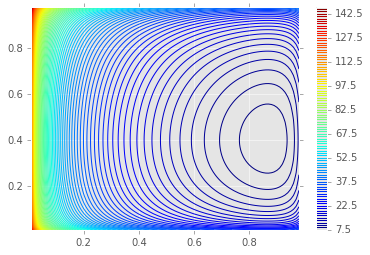

In [87]:
x1 = np.arange(0.01, 0.99, 0.01)
x2 = np.arange(0.01, 0.99, 0.01)
X1, X2 = np.meshgrid(x1, x2)
plt.contour(X1,X2,z,100)
plt.colorbar()


In [93]:
def parab(x):
    return x**2

In [97]:
b = [(-10,10)]

minimize(parab, 2, bounds=b, method='tnc', options={'maxiter': 100})

     fun: array([0.000])
     jac: array([0.000])
 message: 'Local minimum reached (|pg| ~= 0)'
    nfev: 5
     nit: 2
  status: 0
 success: True
       x: array([0.000])

In [98]:
xs = np.array([(5,5), (9,1), (8,2), (4,6), (7,3)])
thetas = np.array([[0.6, 0.4], [0.5, 0.5]])

tol = 0.01
max_iter = 100

ll_old = 0
for i in range(max_iter):
    ws_A = []
    ws_B = []

    vs_A = []
    vs_B = []

    ll_new = 0

    # E-step: calculate probability distributions over possible completions
    for x in xs:

        # multinomial (binomial) log likelihood
        ll_A = np.sum([x*np.log(thetas[0])])
        ll_B = np.sum([x*np.log(thetas[1])])

        # [EQN 1]
        denom = np.exp(ll_A) + np.exp(ll_B)
        w_A = np.exp(ll_A)/denom
        w_B = np.exp(ll_B)/denom

        ws_A.append(w_A)
        ws_B.append(w_B)

        # used for calculating theta
        vs_A.append(np.dot(w_A, x))
        vs_B.append(np.dot(w_B, x))

        # update complete log likelihood
        ll_new += w_A * ll_A + w_B * ll_B

    # M-step: update values for parameters given current distribution
    # [EQN 2]
    thetas[0] = np.sum(vs_A, 0)/np.sum(vs_A)
    thetas[1] = np.sum(vs_B, 0)/np.sum(vs_B)
    # print distribution of z for each x and current parameter estimate

    print "Iteration: %d" % (i+1)
    print "theta_A = %.2f, theta_B = %.2f, ll = %.2f" % (thetas[0,0], thetas[1,0], ll_new)

    if np.abs(ll_new - ll_old) < tol:
        break
    ll_old = ll_new

Iteration: 1
theta_A = 0.71, theta_B = 0.58, ll = -32.69
Iteration: 2
theta_A = 0.75, theta_B = 0.57, ll = -31.26
Iteration: 3
theta_A = 0.77, theta_B = 0.55, ll = -30.76
Iteration: 4
theta_A = 0.78, theta_B = 0.53, ll = -30.33
Iteration: 5
theta_A = 0.79, theta_B = 0.53, ll = -30.07
Iteration: 6
theta_A = 0.79, theta_B = 0.52, ll = -29.95
Iteration: 7
theta_A = 0.80, theta_B = 0.52, ll = -29.90
Iteration: 8
theta_A = 0.80, theta_B = 0.52, ll = -29.88
Iteration: 9
theta_A = 0.80, theta_B = 0.52, ll = -29.87


In [99]:
xs = np.array([(5,5), (9,1), (8,2), (4,6), (7,3)])
thetas = np.array([[0.6, 0.4], [0.5, 0.5]])

tol = 0.01
max_iter = 100

ll_old = -np.infty
for i in range(max_iter):
    ll_A = np.sum(xs * np.log(thetas[0]), axis=1)
    ll_B = np.sum(xs * np.log(thetas[1]), axis=1)
    denom = np.exp(ll_A) + np.exp(ll_B)
    w_A = np.exp(ll_A)/denom
    w_B = np.exp(ll_B)/denom

    vs_A = w_A[:, None] * xs
    vs_B = w_B[:, None] * xs

    thetas[0] = np.sum(vs_A, 0)/np.sum(vs_A)
    thetas[1] = np.sum(vs_B, 0)/np.sum(vs_B)

    ll_new = w_A.dot(ll_A) + w_B.dot(ll_B)

    print "Iteration: %d" % (i+1)
    print "theta_A = %.2f, theta_B = %.2f, ll = %.2f" % (thetas[0,0], thetas[1,0], ll_new)

    if np.abs(ll_new - ll_old) < tol:
        break
    ll_old = ll_new

Iteration: 1
theta_A = 0.71, theta_B = 0.58, ll = -32.69
Iteration: 2
theta_A = 0.75, theta_B = 0.57, ll = -31.26
Iteration: 3
theta_A = 0.77, theta_B = 0.55, ll = -30.76
Iteration: 4
theta_A = 0.78, theta_B = 0.53, ll = -30.33
Iteration: 5
theta_A = 0.79, theta_B = 0.53, ll = -30.07
Iteration: 6
theta_A = 0.79, theta_B = 0.52, ll = -29.95
Iteration: 7
theta_A = 0.80, theta_B = 0.52, ll = -29.90
Iteration: 8
theta_A = 0.80, theta_B = 0.52, ll = -29.88
Iteration: 9
theta_A = 0.80, theta_B = 0.52, ll = -29.87


In [100]:
def em(xs, thetas, max_iter=100, tol=1e-6):
    """Expectation-maximization for coin sample problem."""

    ll_old = -np.infty
    for i in range(max_iter):
        ll = np.array([np.sum(xs * np.log(theta), axis=1) for theta in thetas])
        lik = np.exp(ll)
        ws = lik/lik.sum(0)
        vs = np.array([w[:, None] * xs for w in ws])
        thetas = np.array([v.sum(0)/v.sum() for v in vs])
        ll_new = np.sum([w*l for w, l in zip(ws, ll)])
        if np.abs(ll_new - ll_old) < tol:
            break
        ll_old = ll_new
    return i, thetas, ll_new

In [101]:
xs = np.array([(5,5), (9,1), (8,2), (4,6), (7,3)])
thetas = np.array([[0.6, 0.4], [0.5, 0.5]])

i, thetas, ll = em(xs, thetas)
print i
for theta in thetas:
    print theta
print ll

18
[0.797 0.203]
[0.520 0.480]
-29.868676155


In [102]:
np.random.seed(1234)

n = 100
p0 = 0.8
p1 = 0.35
xs = np.concatenate([np.random.binomial(n, p0, n/2), np.random.binomial(n, p1, n/2)])
xs = np.column_stack([xs, n-xs])
np.random.shuffle(xs)

In [103]:
results = [em(xs, np.random.random((2,2))) for i in range(10)]
i, thetas, ll =  sorted(results, key=lambda x: x[-1])[-1]
print i
for theta in thetas:
    print theta
print ll

4
[0.352 0.648]
[0.798 0.202]
-5756.59565198


In [104]:
results

[(4, array([[0.352, 0.648],
         [0.798, 0.202]]), -5756.5956519787851), (4, array([[0.352, 0.648],
         [0.798, 0.202]]), -5756.5956519787851), (4, array([[0.352, 0.648],
         [0.798, 0.202]]), -5756.5956519787851), (4, array([[0.798, 0.202],
         [0.352, 0.648]]), -5756.5956519787851), (4, array([[0.798, 0.202],
         [0.352, 0.648]]), -5756.5956519787851), (4, array([[0.798, 0.202],
         [0.352, 0.648]]), -5756.5956519787851), (4, array([[0.352, 0.648],
         [0.798, 0.202]]), -5756.5956519787851), (4, array([[0.352, 0.648],
         [0.798, 0.202]]), -5756.5956519787851), (4, array([[0.798, 0.202],
         [0.352, 0.648]]), -5756.5956519787851), (4, array([[0.352, 0.648],
         [0.798, 0.202]]), -5756.5956519787851)]

In [105]:
import scipy.stats as st
def f(x, y):
    z = np.column_stack([x.ravel(), y.ravel()])
    return (0.1*st.multivariate_normal([0,0], 1*np.eye(2)).pdf(z) +
            0.4*st.multivariate_normal([3,3], 2*np.eye(2)).pdf(z) +
            0.5*st.multivariate_normal([0,5], 3*np.eye(2)).pdf(z))

In [106]:
f(np.arange(3), np.arange(3))


array([0.017, 0.012, 0.023])

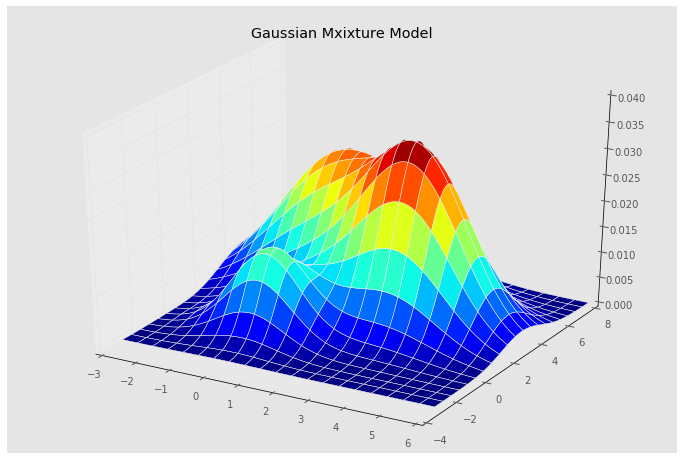

In [107]:
s = 200
x = np.linspace(-3, 6, s)
y = np.linspace(-3, 8, s)
X, Y = np.meshgrid(x, y)
Z = np.reshape(f(X, Y), (s, s))

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='jet')
plt.title('Gaussian Mxixture Model');

In [110]:
from numbapro import cuda, vectorize, guvectorize, check_cuda
from numbapro import void, uint8 , uint32, uint64, int32, int64, float32, float64, f8
import numpy as np

ImportError: No module named numbapro